In [1]:
import pandas as pd
import numpy as np
#coding=utf-8
import numpy as np
import pandas as pd
from scipy.stats import mode
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from matplotlib import  pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn import preprocessing  
min_max_scaler = preprocessing.MinMaxScaler()  
from sklearn.model_selection import KFold,StratifiedKFold

In [2]:
fulldata = pd.read_csv("../dealinput/orderCount430.csv")
print(fulldata.columns)
print(fulldata.isnull().sum())
fulldata.head()

d:\gongju\python3.6 64\anzhuang\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['id', 'orderInfo_work_time_more_cate', 'orderInfo_week_more_cate',
       'orderInfo_year_more_cate', 'orderInfo_month_more_cate',
       'orderInfo_day_more_cate', 'orderInfo_isoweekday_more_cate',
       'orderInfo_month_stage_more_cate', 'orderInfo_type_pay_more_cate',
       'orderInfo_sts_order_more_cate', 'orderInfo_lossNUm_max',
       'orderInfo_lossNUm_ave', 'orderInfo_work_time_more_proportion',
       'orderInfo_luck', 'orderInfo_name_rec_md5_num',
       'orderInfo_week_more_proportion', 'orderInfo_year_more_proportion',
       'orderInfo_month_more_proportion', 'orderInfo_day_more_proportion',
       'orderInfo_isoweekday_more_proportion',
       'orderInfo_month_stage_more_proportion', 'orderInfo_type_pay_cate_num',
       'orderInfo_type_pay_more_proportion',
       'orderInfo_type_pay_special_proportion',
       'orderInfo_whitePayment_proportion', 'orderInfo_sts_order_cate_num',
       'orderInfo_sts_order_more_proportion', 'orderInfo_phone_cate_num',
       'or

,id,orderInfo_work_time_more_cate,orderInfo_week_more_cate,orderInfo_year_more_cate,orderInfo_month_more_cate,orderInfo_day_more_cate,orderInfo_isoweekday_more_cate,orderInfo_month_stage_more_cate,orderInfo_type_pay_more_cate,orderInfo_sts_order_more_cate,...,orderInfo_buy_time_Oldest,orderInfo_buy_money_max,orderInfo_buy_money_min,orderInfo_buy_money_ave,orderInfo_buy_money_std,orderInfo_buy_money_maxCutmin,orderInfo_buy_money_total2017,orderInfo_buy_money_total2016,orderInfo_buy_money_total2015,orderInfo_buy_money_maxCutave
0,20160328090001743085,0,37,2015,9,20,5,2,在线支付,完成,...,1442012407,41931.0,4888.0,23409.500000,18521.500000,37043.0,0.0,4888.0,41931.0,18521.500000
1,20160328160001756263,0,22,2017,5,31,3,3,在线支付,完成,...,1496267293,99.0,99.0,99.000000,0.000000,0.0,99.0,0.0,0.0,0.000000
2,20160328170001757443,0,22,2017,5,31,3,3,在线支付,完成,...,1496267293,99.0,99.0,99.000000,0.000000,0.0,99.0,0.0,0.0,0.000000
3,20160328190001761939,1,50,2013,10,12,4,1,货到付款,完成,...,1335451800,3983.0,0.0,368.271429,701.495666,3983.0,0.0,29.9,4931.5,3614.728571
4,20160329140001784605,0,10,2015,3,12,1,1,在线支付,完成,...,1385592611,5688.0,44.9,1672.086364,2182.080915,5643.1,0.0,29274.8,5148.5,4015.913636


In [4]:
fulldata.id = fulldata.id.astype('str')
len(fulldata.id.unique())

162511

In [5]:
'''

((['id', 'orderInfo_work_time_more_cate', 'orderInfo_week_more_cate',
       'orderInfo_year_more_cate', 'orderInfo_month_more_cate',
       'orderInfo_day_more_cate', 'orderInfo_isoweekday_more_cate',
       'orderInfo_month_stage_more_cate', 'orderInfo_type_pay_more_cate',
       'orderInfo_sts_order_more_cate', 'orderInfo_lossNUm_max',
       'orderInfo_lossNUm_ave', 'orderInfo_work_time_more_proportion',
       'orderInfo_luck', 'orderInfo_name_rec_md5_num',
       'orderInfo_week_more_proportion', 'orderInfo_year_more_proportion',
       'orderInfo_month_more_proportion', 'orderInfo_day_more_proportion',
       'orderInfo_isoweekday_more_proportion',
       'orderInfo_month_stage_more_proportion', 'orderInfo_type_pay_cate_num',
       'orderInfo_type_pay_more_proportion',
       'orderInfo_type_pay_special_proportion',
       'orderInfo_whitePayment_proportion', 'orderInfo_sts_order_cate_num',
       'orderInfo_sts_order_more_proportion', 'orderInfo_phone_cate_num',
       'orderInfo_phone_money_max', 'orderInfo_phone_money_ave',
       'orderInfo_phone_money_proportion', 'orderInfo_buy_time_interval',
       'orderInfo_buy_time_latest', 'orderInfo_buy_time_Oldest',
       'orderInfo_buy_money_max', 'orderInfo_buy_money_min',
       'orderInfo_buy_money_ave', 'orderInfo_buy_money_std',
       'orderInfo_buy_money_maxCutmin', 'orderInfo_buy_money_total2017',
       'orderInfo_buy_money_total2016', 'orderInfo_buy_money_total2015',
       'orderInfo_buy_money_maxCutave']
'''
cate_feature = ['orderInfo_work_time_more_cate', 'orderInfo_week_more_cate',
       'orderInfo_year_more_cate', 'orderInfo_month_more_cate',
       'orderInfo_day_more_cate', 'orderInfo_isoweekday_more_cate',
       'orderInfo_month_stage_more_cate', 'orderInfo_type_pay_more_cate',
       'orderInfo_sts_order_more_cate']
num_feature = ['orderInfo_lossNUm_max',
       'orderInfo_lossNUm_ave', 'orderInfo_work_time_more_proportion',
       'orderInfo_luck', 'orderInfo_name_rec_md5_num',
       'orderInfo_week_more_proportion', 'orderInfo_year_more_proportion',
       'orderInfo_month_more_proportion', 'orderInfo_day_more_proportion',
       'orderInfo_isoweekday_more_proportion',
       'orderInfo_month_stage_more_proportion', 'orderInfo_type_pay_cate_num',
       'orderInfo_type_pay_more_proportion',
       'orderInfo_type_pay_special_proportion',
       'orderInfo_whitePayment_proportion', 'orderInfo_sts_order_cate_num',
       'orderInfo_sts_order_more_proportion', 'orderInfo_phone_cate_num',
       'orderInfo_phone_money_max', 'orderInfo_phone_money_ave',
       'orderInfo_phone_money_proportion', 'orderInfo_buy_time_interval',
       'orderInfo_buy_time_latest', 'orderInfo_buy_time_Oldest',
       'orderInfo_buy_money_max', 'orderInfo_buy_money_min',
       'orderInfo_buy_money_ave', 'orderInfo_buy_money_std',
       'orderInfo_buy_money_maxCutmin', 'orderInfo_buy_money_total2017',
       'orderInfo_buy_money_total2016', 'orderInfo_buy_money_total2015',
       'orderInfo_buy_money_maxCutave']


In [6]:
from sklearn import preprocessing  
min_max_scaler = preprocessing.StandardScaler()

for i in range(len(cate_feature)):
    tmp = pd.get_dummies(fulldata[cate_feature[i]],prefix = cate_feature[i])
    fulldata = pd.concat([fulldata,tmp],axis = 1) 
    del fulldata[cate_feature[i]]
num = pd.DataFrame(min_max_scaler.fit_transform(fulldata[num_feature]),columns = num_feature)
fulldata.drop(columns = num_feature,inplace = True)
fulldata = pd.concat([fulldata,num],axis = 1) 
# m = fulldata.target.copy()
# del fulldata["target"]
# fulldata.insert(1,"target",m)
fulldata

,id,orderInfo_work_time_more_cate_0,orderInfo_work_time_more_cate_1,orderInfo_week_more_cate_1,orderInfo_week_more_cate_2,orderInfo_week_more_cate_3,orderInfo_week_more_cate_4,orderInfo_week_more_cate_5,orderInfo_week_more_cate_6,orderInfo_week_more_cate_7,...,orderInfo_buy_time_Oldest,orderInfo_buy_money_max,orderInfo_buy_money_min,orderInfo_buy_money_ave,orderInfo_buy_money_std,orderInfo_buy_money_maxCutmin,orderInfo_buy_money_total2017,orderInfo_buy_money_total2016,orderInfo_buy_money_total2015,orderInfo_buy_money_maxCutave
0,20160328090001743085,1,0,0,0,0,0,0,0,0,...,-1.049221,11.840776,5.569065,23.072368,23.832146,10.649468,-0.245972,0.060020,10.428790,5.709147
1,20160328160001756263,1,0,0,0,0,0,0,0,0,...,0.688998,-0.412723,-0.089490,-0.289397,-0.432526,-0.397606,-0.223727,-0.226855,-0.148000,-0.367533
2,20160328170001757443,1,0,0,0,0,0,0,0,0,...,0.688998,-0.412723,-0.089490,-0.289397,-0.432526,-0.397606,-0.223727,-0.226855,-0.148000,-0.367533
3,20160328190001761939,0,1,0,0,0,0,0,0,0,...,-4.463210,0.724985,-0.206466,-0.019533,0.486490,0.790216,-0.245972,-0.225100,1.095935,0.818416
4,20160329140001784605,1,0,0,0,0,0,0,0,0,...,-2.856798,1.224416,-0.153413,1.287149,2.426177,1.285296,-0.245972,1.491271,1.150672,0.950040
5,20160329160001788684,1,0,0,0,0,0,0,0,0,...,-1.090618,-0.063854,-0.153295,-0.035554,0.134165,-0.026318,-0.245972,-0.218990,0.440230,-0.059880
6,20160329180001790470,1,0,0,0,0,0,0,0,0,...,0.688998,-0.412723,-0.089490,-0.289397,-0.432526,-0.397606,-0.223727,-0.226855,-0.148000,-0.367533
7,20160329180001791648,1,0,0,0,0,0,0,0,0,...,0.688998,-0.412723,-0.089490,-0.289397,-0.432526,-0.397606,-0.223727,-0.226855,-0.148000,-0.367533
8,20160329200001794164,0,1,0,0,0,0,0,0,1,...,-2.571368,-0.114060,-0.206466,0.233617,0.176521,-0.064014,-0.245972,-0.226855,0.134159,-0.204232
9,20160330090001805556,1,0,0,0,0,0,0,0,0,...,-1.221765,0.143828,-0.138052,-0.011156,0.299360,0.181275,-0.245972,-0.206020,0.712476,0.164747


In [7]:
fulldata.id.dtype,fulldata.info()
fulldata.id = fulldata.id.astype("str")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167960 entries, 0 to 167959
Columns: 191 entries, id to orderInfo_buy_money_ave
dtypes: float64(24), object(1), uint8(166)
memory usage: 58.6+ MB


In [7]:
fulldata.to_csv("../orderOk430.csv",index = False)

In [20]:
fulldata = pd.read_csv("../orderOk430.csv")
fulldata.id = fulldata.id.astype("str")
train11 = pd.read_csv("../dealinput/train2ok.csv")
test11 = pd.read_csv("../dealinput/test2ok.csv")
print(train11.shape,test11.shape)
fulldata

d:\gongju\python3.6 64\anzhuang\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(120929, 115) (47031, 114)


,id,orderInfo_work_time_more_cate_0,orderInfo_work_time_more_cate_1,orderInfo_week_more_cate_1,orderInfo_week_more_cate_2,orderInfo_week_more_cate_3,orderInfo_week_more_cate_4,orderInfo_week_more_cate_5,orderInfo_week_more_cate_6,orderInfo_week_more_cate_7,...,orderInfo_buy_time_Oldest,orderInfo_buy_money_max,orderInfo_buy_money_min,orderInfo_buy_money_ave,orderInfo_buy_money_std,orderInfo_buy_money_maxCutmin,orderInfo_buy_money_total2017,orderInfo_buy_money_total2016,orderInfo_buy_money_total2015,orderInfo_buy_money_maxCutave
0,20160328090001743085,1,0,0,0,0,0,0,0,0,...,-1.049221,11.840776,5.569065,23.072368,23.832146,10.649468,-0.245972,0.060020,10.428790,5.709147
1,20160328160001756263,1,0,0,0,0,0,0,0,0,...,0.688998,-0.412723,-0.089490,-0.289397,-0.432526,-0.397606,-0.223727,-0.226855,-0.148000,-0.367533
2,20160328170001757443,1,0,0,0,0,0,0,0,0,...,0.688998,-0.412723,-0.089490,-0.289397,-0.432526,-0.397606,-0.223727,-0.226855,-0.148000,-0.367533
3,20160328190001761939,0,1,0,0,0,0,0,0,0,...,-4.463210,0.724985,-0.206466,-0.019533,0.486490,0.790216,-0.245972,-0.225100,1.095935,0.818416
4,20160329140001784605,1,0,0,0,0,0,0,0,0,...,-2.856798,1.224416,-0.153413,1.287149,2.426177,1.285296,-0.245972,1.491271,1.150672,0.950040
5,20160329160001788684,1,0,0,0,0,0,0,0,0,...,-1.090618,-0.063854,-0.153295,-0.035554,0.134165,-0.026318,-0.245972,-0.218990,0.440230,-0.059880
6,20160329180001790470,1,0,0,0,0,0,0,0,0,...,0.688998,-0.412723,-0.089490,-0.289397,-0.432526,-0.397606,-0.223727,-0.226855,-0.148000,-0.367533
7,20160329180001791648,1,0,0,0,0,0,0,0,0,...,0.688998,-0.412723,-0.089490,-0.289397,-0.432526,-0.397606,-0.223727,-0.226855,-0.148000,-0.367533
8,20160329200001794164,0,1,0,0,0,0,0,0,1,...,-2.571368,-0.114060,-0.206466,0.233617,0.176521,-0.064014,-0.245972,-0.226855,0.134159,-0.204232
9,20160330090001805556,1,0,0,0,0,0,0,0,0,...,-1.221765,0.143828,-0.138052,-0.011156,0.299360,0.181275,-0.245972,-0.206020,0.712476,0.164747


In [21]:
ff

['orderInfo_work_time_more_cate_0',
 'orderInfo_week_more_cate_1',
 'orderInfo_week_more_cate_2',
 'orderInfo_week_more_cate_13',
 'orderInfo_week_more_cate_15',
 'orderInfo_week_more_cate_23',
 'orderInfo_week_more_cate_24',
 'orderInfo_week_more_cate_34',
 'orderInfo_week_more_cate_36',
 'orderInfo_week_more_cate_44',
 'orderInfo_week_more_cate_45',
 'orderInfo_week_more_cate_46',
 'orderInfo_week_more_cate_50',
 'orderInfo_week_more_cate_51',
 'orderInfo_year_more_cate_2015',
 'orderInfo_year_more_cate_2016',
 'orderInfo_month_more_cate_1',
 'orderInfo_month_more_cate_3',
 'orderInfo_month_more_cate_6',
 'orderInfo_month_more_cate_8',
 'orderInfo_month_more_cate_10',
 'orderInfo_month_more_cate_11',
 'orderInfo_day_more_cate_1',
 'orderInfo_day_more_cate_2',
 'orderInfo_day_more_cate_5',
 'orderInfo_day_more_cate_8',
 'orderInfo_day_more_cate_9',
 'orderInfo_day_more_cate_10',
 'orderInfo_day_more_cate_12',
 'orderInfo_day_more_cate_13',
 'orderInfo_day_more_cate_16',
 'orderInfo_da

In [22]:
mm = train11[["id","target"]]
train = mm.merge(fulldata,how = 'left',on = 'id')
train

,id,target,orderInfo_work_time_more_cate_0,orderInfo_work_time_more_cate_1,orderInfo_week_more_cate_1,orderInfo_week_more_cate_2,orderInfo_week_more_cate_3,orderInfo_week_more_cate_4,orderInfo_week_more_cate_5,orderInfo_week_more_cate_6,...,orderInfo_buy_time_Oldest,orderInfo_buy_money_max,orderInfo_buy_money_min,orderInfo_buy_money_ave,orderInfo_buy_money_std,orderInfo_buy_money_maxCutmin,orderInfo_buy_money_total2017,orderInfo_buy_money_total2016,orderInfo_buy_money_total2015,orderInfo_buy_money_maxCutave
0,501951980776722440,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.688998,-0.412723,-0.089490,-0.289397,-0.432526,-0.397606,-0.223727,-0.226855,-0.148000,-0.367533
1,525890212484616200,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.688998,-0.412723,-0.089490,-0.289397,-0.432526,-0.397606,-0.223727,-0.226855,-0.148000,-0.367533
2,599309364691472392,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.969876,0.729378,-0.206466,0.299567,0.754131,0.794690,0.861998,1.019025,1.047883,0.718874
3,582559913071350024,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004840,-0.386653,-0.089490,-0.244799,-0.374228,-0.371064,-0.245972,-0.210011,-0.148000,-0.352933
4,599017959926534408,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.688998,-0.412723,-0.089490,-0.289397,-0.432526,-0.397606,-0.223727,-0.226855,-0.148000,-0.367533
5,575388917721731080,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.273442,-0.420533,-0.206466,-0.353503,-0.395858,-0.376032,-0.245972,-0.218630,-0.148000,-0.355293
6,541887664329068552,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.688998,-0.412723,-0.089490,-0.289397,-0.432526,-0.397606,-0.223727,-0.226855,-0.148000,-0.367533
7,605760099452981512,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.688998,-0.412723,-0.089490,-0.289397,-0.432526,-0.397606,-0.223727,-0.226855,-0.148000,-0.367533
8,472286860756914440,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.688998,-0.412723,-0.089490,-0.289397,-0.432526,-0.397606,-0.223727,-0.226855,-0.148000,-0.367533
9,600450091387457800,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.501355,0.990079,-0.111467,1.364117,2.044992,1.036131,2.504843,-0.226855,-0.148000,0.662373


In [10]:
train.isnull().sum()

id                                          0
target                                      0
orderInfo_work_time_more_cate_0          4258
orderInfo_work_time_more_cate_1          4258
orderInfo_week_more_cate_1               4258
orderInfo_week_more_cate_2               4258
orderInfo_week_more_cate_3               4258
orderInfo_week_more_cate_4               4258
orderInfo_week_more_cate_5               4258
orderInfo_week_more_cate_6               4258
orderInfo_week_more_cate_7               4258
orderInfo_week_more_cate_8               4258
orderInfo_week_more_cate_9               4258
orderInfo_week_more_cate_10              4258
orderInfo_week_more_cate_11              4258
orderInfo_week_more_cate_12              4258
orderInfo_week_more_cate_13              4258
orderInfo_week_more_cate_14              4258
orderInfo_week_more_cate_15              4258
orderInfo_week_more_cate_16              4258
orderInfo_week_more_cate_17              4258
orderInfo_week_more_cate_18       

In [25]:
fulldata.id = fulldata.id.astype("str")
mm = test11[["id","qq_bound_已绑定"]]
mm.id = mm.id.astype("str")
test = mm.merge(fulldata,how = 'left',on = 'id')

print(test.shape)
del test["qq_bound_已绑定"]
print(test.shape)
test

d:\gongju\python3.6 64\anzhuang\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(47031, 180)
(47031, 179)


,id,orderInfo_work_time_more_cate_0,orderInfo_work_time_more_cate_1,orderInfo_week_more_cate_1,orderInfo_week_more_cate_2,orderInfo_week_more_cate_3,orderInfo_week_more_cate_4,orderInfo_week_more_cate_5,orderInfo_week_more_cate_6,orderInfo_week_more_cate_7,...,orderInfo_buy_time_Oldest,orderInfo_buy_money_max,orderInfo_buy_money_min,orderInfo_buy_money_ave,orderInfo_buy_money_std,orderInfo_buy_money_maxCutmin,orderInfo_buy_money_total2017,orderInfo_buy_money_total2016,orderInfo_buy_money_total2015,orderInfo_buy_money_maxCutave
0,637832512621515016,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.085679,1.253708,-0.205284,1.508348,2.857511,1.328210,1.054588,0.211063,-0.148000,0.910435
1,624385123294384392,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.415434,-0.031925,-0.147505,0.148531,0.369086,0.004727,-0.210245,-0.141819,-0.148000,-0.084382
2,636912835502280712,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.737066,1.830764,-0.199140,0.135830,1.937994,1.914159,-0.245972,0.295248,-0.148000,2.006087
3,638094054000693512,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.688998,-0.412723,-0.089490,-0.289397,-0.432526,-0.397606,-0.223727,-0.226855,-0.148000,-0.367533
4,636732958538993928,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.405669,0.993301,-0.089490,0.431595,1.362087,1.033864,1.263244,-0.140728,-0.148000,0.971259
5,636668423459311624,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.662022,0.641795,-0.194768,0.487014,1.357358,0.702568,0.761557,0.227872,-0.148000,0.559412
6,628171292146667528,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.125299,0.366448,-0.205284,-0.258092,0.160576,0.424893,0.391432,-0.125817,-0.148000,0.494933
7,623732422298570760,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.737847,-0.393097,-0.010324,-0.222250,-0.432526,-0.397606,-0.245972,-0.217112,-0.148000,-0.367533
8,637388003227996424,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.688998,-0.412723,-0.089490,-0.289397,-0.432526,-0.397606,-0.223727,-0.226855,-0.148000,-0.367533
9,626505930430746888,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.688998,-0.412723,-0.089490,-0.289397,-0.432526,-0.397606,-0.223727,-0.226855,-0.148000,-0.367533


In [55]:
len(ff)

79

In [26]:
# cc = train[ff]
# cc.insert(0,"id",train.id)
# zz = train11.merge(cc,how = 'left',on = 'id')
# print(zz.shape,train11.isnull().sum())
# zz.to_csv("../dealinput/train430ok.csv",index = False)
cc = test[ff]
cc.insert(0,"id",test.id)
cc.id = cc.id.astype("str")
test11.id = test11.id.astype("str")
zz = test11.merge(cc,how = 'left',on = 'id')
print(zz.shape,zz.isnull().sum())
zz.to_csv("../dealinput/test430ok.csv",index = False)

d:\gongju\python3.6 64\anzhuang\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(47031, 193) id                                          0
qq_bound_已绑定                                0
qq_bound_未绑定                                0
sex_保密                                      0
sex_女                                       0
sex_男                                       0
wechat_bound_已绑定                            0
wechat_bound_未绑定                            0
auth_time_day_1                             0
auth_time_day_4                             0
auth_time_day_6                             0
auth_time_day_8                             0
auth_time_day_9                             0
auth_time_day_12                            0
auth_time_day_13                            0
auth_time_day_24                            0
auth_time_day_25                            0
auth_time_day_26                            0
auth_time_day_29                            0
auth_time_day_30                            0
auth_time_mon_1                             0
auth_time_mon_2      

In [24]:
zz.isnull().sum()

id                                          0
target                                      0
qq_bound_已绑定                                0
qq_bound_未绑定                                0
sex_保密                                      0
sex_女                                       0
sex_男                                       0
wechat_bound_已绑定                            0
wechat_bound_未绑定                            0
auth_time_day_1                             0
auth_time_day_4                             0
auth_time_day_6                             0
auth_time_day_8                             0
auth_time_day_9                             0
auth_time_day_12                            0
auth_time_day_13                            0
auth_time_day_24                            0
auth_time_day_25                            0
auth_time_day_26                            0
auth_time_day_29                            0
auth_time_day_30                            0
auth_time_mon_1                   

In [18]:
# trainx = train.iloc[:,2:]
trainx = train[ff]
trainy = train.iloc[:,1]
print("trainx.shape",trainx.shape)
print("trainy.shape",trainy.shape)
from sklearn.cross_validation import train_test_split
x_train,x_valid,y_train,y_valid = train_test_split(trainx,trainy,test_size = 0.2,random_state = 2)  
print("x_train.shape",x_train.shape)
print("x_valid.shape",x_valid.shape)
print("y_train.shape",y_train.shape)
print("y_valid.shape",y_valid.shape)

trainx.shape (120929, 79)
trainy.shape (120929,)
x_train.shape (96743, 79)
x_valid.shape (24186, 79)
y_train.shape (96743,)
y_valid.shape (24186,)


In [19]:
skf = StratifiedKFold(n_splits=5)
xgb1 = XGBClassifier(
#         booster = 'dart',
        learning_rate =0.1,
        n_estimators=5000,
        max_depth=5,
        min_child_weight=5,
        gamma=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=3,
        scale_pos_weight=1,
        StratifiedKFold = True,
        seed = 1)          
xgb_param = xgb1.get_xgb_params()
#构建稀疏矩阵，运行更快
xgtrain = xgb.DMatrix(x_train, label = y_train)
mm = xgb.cv(xgb_param, xgtrain, num_boost_round=1000, nfold=3,
    metrics='auc', early_stopping_rounds=50)
mm.iloc[-3:,:]  
# 39
# 0.581482
# 0.003473
# 0.665303
# 0.001549
# 99
# 0.592650
# 0.004979
# 0.738485
# 0.003063  原始

,test-auc-mean,test-auc-std,train-auc-mean,train-auc-std
72,0.591786,0.004556,0.720941,0.002499
73,0.592617,0.004563,0.722216,0.002863
74,0.593194,0.004512,0.722188,0.002587


In [13]:
importance = 0
for i in range(5):
    xgb1 = XGBClassifier(
    #         booster = 'dart',
            learning_rate =0.1,
            n_estimators=mm.shape[0],
            max_depth=5,
            min_child_weight=5,
            gamma=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            objective= 'binary:logistic',
            nthread=3,
            scale_pos_weight=1,
            StratifiedKFold = True,          #0.866124	0.008005	0.965337	0.002286
            seed=1)
    xgb1.fit(x_train,y_train)
    prexgb = xgb1.predict_proba(x_valid)[:,1]
    auc = roc_auc_score(y_valid,prexgb)
    print("xgb1 auc",auc)
    importance += xgb1.feature_importances_
importance = importance/5

xgb1 auc 0.5880976990867379
xgb1 auc 0.5880976990867379
xgb1 auc 0.5880976990867379
xgb1 auc 0.5880976990867379
xgb1 auc 0.5880976990867379


In [17]:
print(trainx.columns,importance)
number = 0
ff = []
for i in range(len(importance)):
    if importance[i] >0.001:
        ff.append(trainx.columns[i])
        number += 1
print(number)
ff,len(ff)

Index(['orderInfo_work_time_more_cate_0', 'orderInfo_work_time_more_cate_1',
       'orderInfo_week_more_cate_1', 'orderInfo_week_more_cate_2',
       'orderInfo_week_more_cate_3', 'orderInfo_week_more_cate_4',
       'orderInfo_week_more_cate_5', 'orderInfo_week_more_cate_6',
       'orderInfo_week_more_cate_7', 'orderInfo_week_more_cate_8',
       ...
       'orderInfo_buy_time_Oldest', 'orderInfo_buy_money_max',
       'orderInfo_buy_money_min', 'orderInfo_buy_money_ave',
       'orderInfo_buy_money_std', 'orderInfo_buy_money_maxCutmin',
       'orderInfo_buy_money_total2017', 'orderInfo_buy_money_total2016',
       'orderInfo_buy_money_total2015', 'orderInfo_buy_money_maxCutave'],
      dtype='object', length=178) [0.00420389 0.         0.00105097 0.00157646 0.00052549 0.
 0.         0.         0.00052549 0.00052549 0.         0.00052549
 0.00052549 0.00052549 0.00105097 0.         0.00157646 0.
 0.         0.         0.         0.         0.         0.00052549
 0.00105097 0.001576

(['orderInfo_work_time_more_cate_0',
  'orderInfo_week_more_cate_1',
  'orderInfo_week_more_cate_2',
  'orderInfo_week_more_cate_13',
  'orderInfo_week_more_cate_15',
  'orderInfo_week_more_cate_23',
  'orderInfo_week_more_cate_24',
  'orderInfo_week_more_cate_34',
  'orderInfo_week_more_cate_36',
  'orderInfo_week_more_cate_44',
  'orderInfo_week_more_cate_45',
  'orderInfo_week_more_cate_46',
  'orderInfo_week_more_cate_50',
  'orderInfo_week_more_cate_51',
  'orderInfo_year_more_cate_2015',
  'orderInfo_year_more_cate_2016',
  'orderInfo_month_more_cate_1',
  'orderInfo_month_more_cate_3',
  'orderInfo_month_more_cate_6',
  'orderInfo_month_more_cate_8',
  'orderInfo_month_more_cate_10',
  'orderInfo_month_more_cate_11',
  'orderInfo_day_more_cate_1',
  'orderInfo_day_more_cate_2',
  'orderInfo_day_more_cate_5',
  'orderInfo_day_more_cate_8',
  'orderInfo_day_more_cate_9',
  'orderInfo_day_more_cate_10',
  'orderInfo_day_more_cate_12',
  'orderInfo_day_more_cate_13',
  'orderInfo_da

orderInfo_buy_time_Oldest                0.065160
orderInfo_lossNUm_ave                    0.058329
orderInfo_buy_time_latest                0.056227
orderInfo_buy_money_total2016            0.056227
orderInfo_buy_money_min                  0.048870
orderInfo_type_pay_more_proportion       0.037835
orderInfo_month_stage_more_proportion    0.036784
orderInfo_buy_money_ave                  0.036784
orderInfo_buy_time_interval              0.034682
orderInfo_month_more_proportion          0.033106
orderInfo_buy_money_std                  0.030478
orderInfo_buy_money_total2017            0.029953
orderInfo_work_time_more_proportion      0.029953
orderInfo_buy_money_maxCutave            0.027851
orderInfo_isoweekday_more_proportion     0.027325
orderInfo_phone_money_ave                0.026800
orderInfo_day_more_proportion            0.024698
orderInfo_phone_money_proportion         0.024172
orderInfo_year_more_proportion           0.023647
orderInfo_buy_money_max                  0.023121


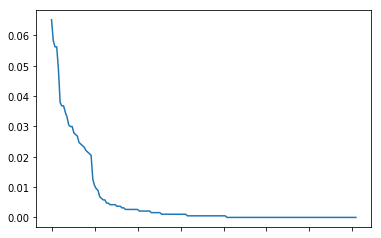

In [16]:
impot = pd.Series(importance,index = trainx.columns)
cc = impot.sort_values(ascending = False)
mm = cc[cc>0.01]
cc.plot()
mm